
# ***Assignment #2***

---

By *Komekbayev Zeyin & Kusainov Aslan*

---



#**Task \#1:** *Load and preprocess the given dataset.*


---



*Loading and preprocessing data is a crucial step in any machine learning task. It involves tasks like loading the data, handling missing values, normalizing or standardizing features, and splitting the dataset into training and testing sets. This step ensures that the data is in a suitable format for training and evaluating the model.*

In [39]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import RandomNormal, glorot_normal
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Agricultural-crops'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and preprocess the training set
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',  # Assuming you have class labels
    subset='training'
)

# Load and preprocess the validation set
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


#**Task \#2:** *Implement a CNN with proper architecture (Fully Connected Layers, Convolution Layers, Pooling Layers etc.). Describe your implementation and explain why you choose such architecture.*


---



*A Convolutional Neural Network (CNN) is a powerful architecture for image-related tasks. The convolutional layers learn spatial hierarchies of features, capturing patterns at different scales. Fully Connected Layers at the end are commonly used for classification. They take the high-level filtered images from the convolutional layers and flatten them into a vector, which is then used for making predictions.*

In [40]:
# Define the CNN architecture
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(30, activation='softmax'))  # Assuming 30 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#**Task \#3:** *Implement chosen architecture above with Sigmoid and ReLU activations functions. Describe your implementation for each activation function.*


---



*Activation functions introduce non-linearity to the model, allowing it to learn complex patterns. Sigmoid is often used in the output layer for binary classification tasks, while ReLU is popular in hidden layers due to its simplicity and ability to mitigate the vanishing gradient problem.*

1.   ***Sigmoid:*** Suitable for binary classification tasks where the output needs to be between 0 and 1, representing probabilities.
2.   ***ReLU:*** Efficiently handles the vanishing gradient problem and accelerates the convergence of stochastic gradient descent.

In [41]:
# Define the CNN architecture with ReLU activation
model_relu = Sequential()
model_relu.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_relu.add(MaxPooling2D(pool_size=(2, 2)))
model_relu.add(Conv2D(64, (3, 3), activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2, 2)))
model_relu.add(Conv2D(128, (3, 3), activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2, 2)))
model_relu.add(Flatten())
model_relu.add(Dense(512, activation='relu'))
model_relu.add(Dense(30, activation='softmax'))
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the CNN architecture with Sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(224, 224, 3)))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Conv2D(64, (3, 3), activation='sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Conv2D(128, (3, 3), activation='sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(30, activation='softmax'))
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#**Task \#4:** *Initialize your weights with two methods (Small random numbers and Xavier). Describe your implementation for each method.*


---



*Weight initialization is crucial to prevent issues like vanishing or exploding gradients during training.*

1.   ***Small random numbers:*** Initialize weights with small random values to break symmetry and ensure that neurons start learning different features.
2.   ***Xavier (Glorot) initialization:*** Specially designed for sigmoid and hyperbolic tangent activation functions, providing better convergence by considering the number of input and output neurons.

In [42]:
# Define the CNN architecture with small random weights
model_small_random = Sequential()
model_small_random.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=RandomNormal(), input_shape=(224, 224, 3)))
model_small_random.add(MaxPooling2D(pool_size=(2, 2)))
model_small_random.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=RandomNormal()))
model_small_random.add(MaxPooling2D(pool_size=(2, 2)))
model_small_random.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=RandomNormal()))
model_small_random.add(MaxPooling2D(pool_size=(2, 2)))
model_small_random.add(Flatten())
model_small_random.add(Dense(512, activation='relu', kernel_initializer=RandomNormal()))
model_small_random.add(Dense(30, activation='softmax'))
model_small_random.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the CNN architecture with Xavier initialization
model_xavier = Sequential()
model_xavier.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=glorot_normal(), input_shape=(224, 224, 3)))
model_xavier.add(MaxPooling2D(pool_size=(2, 2)))
model_xavier.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=glorot_normal()))
model_xavier.add(MaxPooling2D(pool_size=(2, 2)))
model_xavier.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=glorot_normal()))
model_xavier.add(MaxPooling2D(pool_size=(2, 2)))
model_xavier.add(Flatten())
model_xavier.add(Dense(512, activation='relu', kernel_initializer=glorot_normal()))
model_xavier.add(Dense(30, activation='softmax'))
model_xavier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#**Task \#5:** *Apply two regularization methods (Dropout, Batch normalization). Describe your implementation for each method.*


---



*Regularization methods prevent overfitting and enhance the model's generalization ability.*

1.   ***Dropout:*** Randomly "drops out" a fraction of neurons during training, preventing co-adaptation of feature detectors and improving generalization.
2.   ***Batch Normalization:*** Normalizes the input of each layer in a batch, reducing internal covariate shift. It acts as a regularizer and accelerates training.

In [43]:
# Define the CNN architecture with Dropout
model_dropout = Sequential()
model_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.5))
model_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.5))
model_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.5))
model_dropout.add(Flatten())
model_dropout.add(Dense(512, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(30, activation='softmax'))
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the CNN architecture with Batch Normalization
model_batch_norm = Sequential()
model_batch_norm.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_batch_norm.add(Conv2D(64, (3, 3), activation='relu'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_batch_norm.add(Conv2D(128, (3, 3), activation='relu'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_batch_norm.add(Flatten())
model_batch_norm.add(Dense(512, activation='relu'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(30, activation='softmax'))
model_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#**Task \#6:** *Describe, compare, and visualize your results.*


---



*After training the model, it's crucial to evaluate its performance. This involves measuring the balance between metrics like accuracy by epoch. Visualization includes learning curves.*

Epoch 1/15
22/22 [==============================] - 62s 3s/step - loss: 4.1444 - accuracy: 0.0341 - val_loss: 3.3769 - val_accuracy: 0.0387
Epoch 2/15
22/22 [==============================] - 61s 3s/step - loss: 3.3325 - accuracy: 0.0668 - val_loss: 3.3165 - val_accuracy: 0.0645
Epoch 3/15
22/22 [==============================] - 61s 3s/step - loss: 3.1400 - accuracy: 0.1053 - val_loss: 3.0511 - val_accuracy: 0.1226
Epoch 4/15
22/22 [==============================] - 60s 3s/step - loss: 2.8332 - accuracy: 0.1795 - val_loss: 2.9352 - val_accuracy: 0.1226
Epoch 5/15
22/22 [==============================] - 59s 3s/step - loss: 2.6605 - accuracy: 0.2166 - val_loss: 2.8706 - val_accuracy: 0.2194
Epoch 6/15
22/22 [==============================] - 60s 3s/step - loss: 2.4349 - accuracy: 0.2893 - val_loss: 2.8042 - val_accuracy: 0.1742
Epoch 7/15
22/22 [==============================] - 60s 3s/step - loss: 2.3030 - accuracy: 0.3190 - val_loss: 2.8045 - val_accuracy: 0.2194
Epoch 8/15
22/22 [==

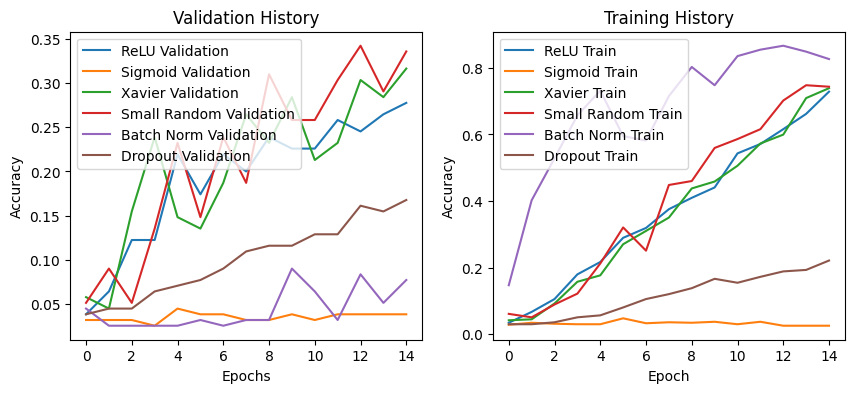

In [44]:
# Train the models
history_relu = model.fit(train_generator, validation_data=validation_generator, epochs=15)
history_sigmoid = model_sigmoid.fit(train_generator, validation_data=validation_generator, epochs=15)
history_xavier = model_xavier.fit(train_generator, validation_data=validation_generator, epochs=15)
history_small_random = model_small_random.fit(train_generator, validation_data=validation_generator, epochs=15)
history_batch_norm = model_batch_norm.fit(train_generator, validation_data=validation_generator, epochs=15)
history_dropout = model_dropout.fit(train_generator, validation_data=validation_generator, epochs=15)

# Plot validation history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['val_accuracy'], label='ReLU Validation')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Validation')
plt.plot(history_xavier.history['val_accuracy'], label='Xavier Validation')
plt.plot(history_small_random.history['val_accuracy'], label='Small Random Validation')
plt.plot(history_batch_norm.history['val_accuracy'], label='Batch Norm Validation')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation')
plt.title('Validation History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train')
plt.plot(history_xavier.history['accuracy'], label='Xavier Train')
plt.plot(history_small_random.history['accuracy'], label='Small Random Train')
plt.plot(history_batch_norm.history['accuracy'], label='Batch Norm Train')
plt.plot(history_dropout.history['accuracy'], label='Dropout Train')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()